# Функции потерь и оптимизация

1. Загрузите данные. Используйте [датасет](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
# Загрузка датасета Iris
iris = load_iris()

In [3]:
# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [4]:
# Фильтрация для классов Iris Versicolor (1) и Iris Virginica (2)
filter_classes = (y == 1) | (y == 2)
X_filtered = X[filter_classes]
y_filtered = y[filter_classes]

In [5]:
# Преобразование y в бинарный формат (0 и 1)
y_filtered = y_filtered - 1

# Конвертация в DataFrame для удобства
iris_df = pd.DataFrame(X_filtered, columns=feature_names)
iris_df['class'] = y_filtered

In [6]:
iris_df.head()  # Вывод первых строк данных для проверки

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.

**Задания 2 и 3 совместил**

In [7]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            # Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Обновление весов
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(model)
        predicted_classes = [1 if i > 0.5 else 0 for i in predictions]
        return np.array(predicted_classes)

4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).

In [8]:
class LogisticRegressionRMSProp(LogisticRegression):
    def __init__(self, learning_rate=0.01, num_iterations=1000, beta=0.9, epsilon=1e-8):
        super().__init__(learning_rate, num_iterations)
        self.beta = beta
        self.epsilon = epsilon

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        v_dw = np.zeros(n_features)
        v_db = 0

        # Градиентный спуск с RMSProp
        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            # Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Вычисление скользящего среднего
            v_dw = self.beta * v_dw + (1 - self.beta) * dw**2
            v_db = self.beta * v_db + (1 - self.beta) * db**2

            # Обновление весов
            self.weights -= (self.learning_rate / (np.sqrt(v_dw) + self.epsilon)) * dw
            self.bias -= (self.learning_rate / (np.sqrt(v_db) + self.epsilon)) * db

5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).

In [9]:
class LogisticRegressionNadam(LogisticRegression):
    def __init__(self, learning_rate=0.01, num_iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(learning_rate, num_iterations)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        m_dw, v_dw = np.zeros(n_features), np.zeros(n_features)
        m_db, v_db = 0, 0
        m_dw_corr, v_dw_corr = np.zeros(n_features), np.zeros(n_features)
        m_db_corr, v_db_corr = 0, 0

        # Градиентный спуск с Nadam
        for i in range(1, self.num_iterations + 1):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            # Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Обновление первого и второго моментов
            m_dw = self.beta1 * m_dw + (1 - self.beta1) * dw
            m_db = self.beta1 * m_db + (1 - self.beta1) * db
            v_dw = self.beta2 * v_dw + (1 - self.beta2) * (dw ** 2)
            v_db = self.beta2 * v_db + (1 - self.beta2) * (db ** 2)

            # Коррекция смещения
            m_dw_corr = m_dw / (1 - self.beta1 ** i)
            m_db_corr = m_db / (1 - self.beta1 ** i)
            v_dw_corr = v_dw / (1 - self.beta2 ** i)
            v_db_corr = v_db / (1 - self.beta2 ** i)

            # Нестерово ускорение
            nesterov_dw = m_dw_corr * self.beta1 + (1 - self.beta1) * dw
            nesterov_db = m_db_corr * self.beta1 + (1 - self.beta1) * db

            # Обновление весов
            self.weights -= (self.learning_rate / (np.sqrt(v_dw_corr) + self.epsilon)) * nesterov_dw
            self.bias -= (self.learning_rate / (np.sqrt(v_db_corr) + self.epsilon)) * nesterov_db

6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [10]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# ... (Код для класса LogisticRegression и функций оптимизации)

# Инициализация данных
X, y = iris_df[feature_names].values, iris_df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели с разными оптимизаторами
methods = {
    'gradient_descent': LogisticRegression(), 
    'rmsprop': LogisticRegressionRMSProp(), 
    'nadam': LogisticRegressionNadam()
}
results = []

for key, model in methods.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append([key, accuracy, end_time - start_time])

# Вывод результатов
results_df = pd.DataFrame(results, columns=['Optimizer', 'Accuracy', 'Time'])
print(results_df)


          Optimizer  Accuracy      Time
0  gradient_descent      0.85  0.009002
1           rmsprop      0.85  0.012997
2             nadam      0.85  0.018001


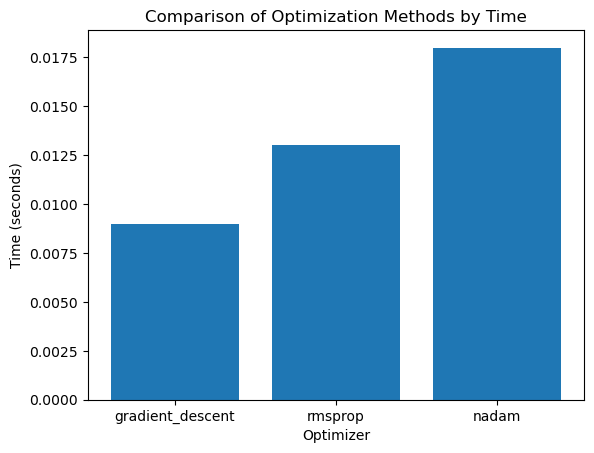

In [11]:
import matplotlib.pyplot as plt

# Создание столбчатой диаграммы времени выполнения
plt.bar(results_df['Optimizer'], results_df['Time'])
plt.xlabel('Optimizer')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Optimization Methods by Time')
plt.show()


Выводы:  
  
*1) Все три метода оптимизации (градиентный спуск, RMSProp и Nadam) достигли одинаковой точности в 0.85. Это означает, что с точки зрения качества предсказаний, все методы работают сопоставимо на данном наборе данных.*  
*2) Существуют различия во времени выполнения для разных методов. Градиентный спуск оказался самым быстрым, затем следует RMSProp, и Nadam занял больше всего времени. Это может быть связано с дополнительными вычислениями, требуемыми более сложными методами оптимизации, такими как Nadam.*  
*3) Несмотря на то, что более продвинутые методы оптимизации, такие как Nadam и RMSProp, часто предполагают более быструю сходимость для сложных задач, в данном случае они не показали значительного преимущества перед стандартным градиентным спуском. Это может быть связано с относительной простотой модели (логистическая регрессия) и/или спецификой набора данных.*